<a href="https://colab.research.google.com/github/aritrasen87/MultiModalModels/blob/main/MultimoalRAG_ColPali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installation

In [1]:
! pip install byaldi --q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.9/517.9 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all t

In [3]:
!sudo apt-get install -y poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.5).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


### Importing ColPali Embedding model

In [4]:
from byaldi import RAGMultiModalModel

model = RAGMultiModalModel.from_pretrained('vidore/colpali-v1.2')

Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


adapter_config.json:   0%|          | 0.00/750 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/66.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/862M [00:00<?, ?B/s]

`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/78.6M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/700 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/243k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/733 [00:00<?, ?B/s]

### Source Data import

In [8]:
!wget https://arxiv.org/pdf/2407.01449
!mv 2407.01449 colpali.pdf

--2024-12-08 15:56:59--  https://arxiv.org/pdf/2407.01449
Resolving arxiv.org (arxiv.org)... 151.101.195.42, 151.101.3.42, 151.101.67.42, ...
Connecting to arxiv.org (arxiv.org)|151.101.195.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9380119 (8.9M) [application/pdf]
Saving to: ‘2407.01449’

2407.01449          100%[===================>]   8.95M  --.-KB/s    in 0.07s   

2024-12-08 15:56:59 (123 MB/s) - ‘2407.01449’ saved [9380119/9380119]



### Index creation

In [9]:
from pathlib import Path

model.index(input_path=Path('/content/colpali.pdf'),
            index_name='colpali',
            store_collection_with_index=True,
            overwrite=True)

Added page 1 of document 0 to index.
Added page 2 of document 0 to index.
Added page 3 of document 0 to index.
Added page 4 of document 0 to index.
Added page 5 of document 0 to index.
Added page 6 of document 0 to index.
Added page 7 of document 0 to index.
Added page 8 of document 0 to index.
Added page 9 of document 0 to index.
Added page 10 of document 0 to index.
Added page 11 of document 0 to index.
Added page 12 of document 0 to index.
Added page 13 of document 0 to index.
Added page 14 of document 0 to index.
Added page 15 of document 0 to index.
Added page 16 of document 0 to index.
Added page 17 of document 0 to index.
Added page 18 of document 0 to index.
Added page 19 of document 0 to index.
Added page 20 of document 0 to index.
Index exported to .byaldi/colpali
Index exported to .byaldi/colpali


{0: '/content/colpali.pdf'}

### Testing with Query

In [19]:
query = """What is ColPali's (late interaction) evaluation base line score on DocQ and InfoQ ?"""

results = model.search(query,k=2)

In [20]:
results

[{'doc_id': 0, 'page_num': 17, 'score': 21.625, 'metadata': {}, 'base64': 'iVBORw0KGgoAAAANSUhEUgAABnYAAAkjCAIAAACzq+aSAAEAAElEQVR4nOzdd1wUx//48TmKgChYsYFixYZYsPfee48txhKNGk2zxMRoNInGFrvG3jX2rqhRsRvBLhasKIggUqQJd/f7Y36f/W6O4sGKqHk9/+CxOzu7Nzu7t8e9b4rOaDQKAAAAAAAAAOllkdkFAAAAAAAAAD5shNgAAAAAAAAATQixAQAAAAAAAJoQYgMAAAAAAAA0IcQGAAAAAAAAaEKIDQAAAAAAANCEEBsAAAAAAACgCSE2AAAAAAAAQBNCbAAAAAAAAIAmhNgAAAAAAAAATQixAQAAAAAAAJoQYgMAAAAAAAA0IcQGAAAAAAAAaEKIDQAAAAAAANCEEBsAAAAAAACgCSE2AAAAAAAAQBNCbAAAAAAAAIAmhNgAAAAAAAAATQixAQAAAAAAAJoQYgMAAAAAAAA0IcQGAAAAAAAAaEKIDQAAAAAAANCEEBsAAAAAAACgCSE2AAAAAAAAQBNCbAAAAAAAAIAmhNgAAAAAAAAATQixAQAAAAAAAJoQYgMAAAAAAAA0IcQGAAAAAAAAaEKIDQAAAAAAANCEEBsAAAAAAACgCSE2AAAAAAAAQBNCbAAAAAAAAIAmhNgAAAAAAAAATQixAQAAAAAAAJoQYgMAAAAAAAA0IcQGAAAAAAAAaEKIDQAAAAAAANCEEBsAAAAAAACgCSE2AAAAAAAAQBNCbAAAAAAAAIAmhNgAAAAAAAAATQixAQAAAAAAAJoQYgMAAAAAAAA0IcQGAAAAAAAAaEKIDQAAAAAAANCEEBsAAAAAAACgCSE2AAAAAAAAQBNCbAAAAAAAAIAmhNgAAAAAAAAATQixAQAAAAAAAJoQYgMAAAAAAAA0IcQGAAAAAAAAaEKIDQAAAAAAANCEE

In [21]:
for result in results:
    print(f"Page number: {result.page_num} Similarity Score: {result.score}")

Page number: 17 Similarity Score: 21.625
Page number: 6 Similarity Score: 20.0


In [22]:
retrieved_page = results[0].base64

### MultiModal RAG -

Query -> ColPali Embedding -> Index -> Retrieved Page(base64) -> Llama 3.2 VLM -> Result

In [17]:
!pip install together --q

from google.colab import userdata
api_key =userdata.get('TOGETHER_KEY')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 3.8 MB/s eta 0:00:00


In [23]:
import os
from together import Together
client = Together(api_key=api_key)
response = client.chat.completions.create(
  model="meta-llama/Llama-3.2-90B-Vision-Instruct-Turbo",
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": query},
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/jpeg;base64,{retrieved_page}",
          },
        },
      ],
    }
  ],
  max_tokens=300,
)
print(response.choices[0].message.content)

The baseline score for ColPali (late interaction) on DocQ is 54.4 and on InfoQ is 81.8.


**Result verification**

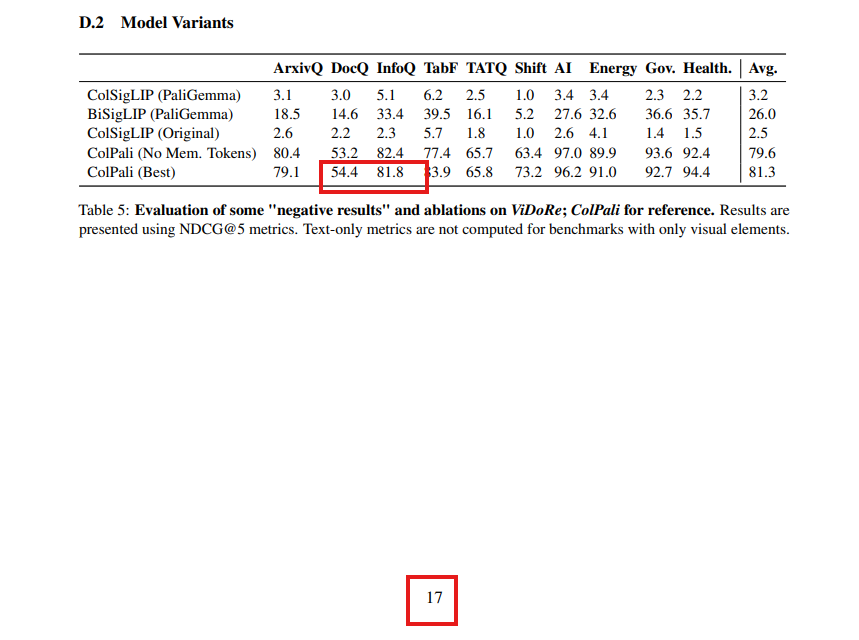

**Comparison between Models**

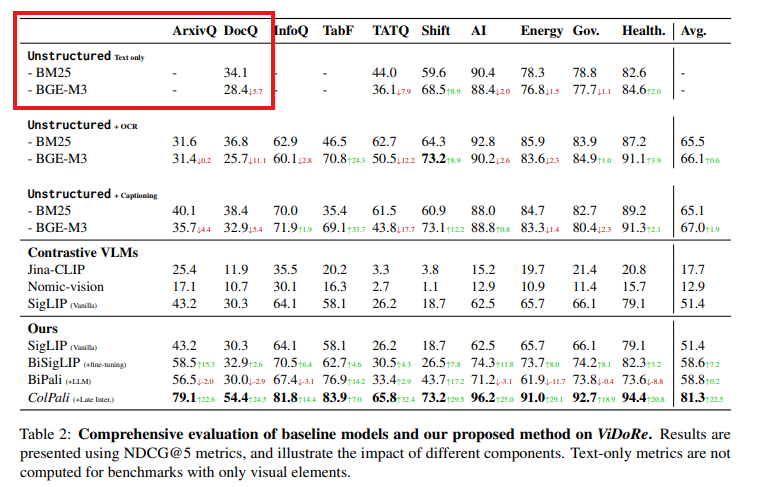

In [24]:
query = 'For unstructured text only , between BM25 and BGE-M3 which model performs better for DocQ evaluation baseline'

In [25]:
results = model.search(query,k=1)
retrieved_page = results[0].base64

In [26]:
response = client.chat.completions.create(
  model="meta-llama/Llama-3.2-90B-Vision-Instruct-Turbo",
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": query},
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/jpeg;base64,{retrieved_page}",
          },
        },
      ],
    }
  ],
  max_tokens=300,
)
print(response.choices[0].message.content)

To determine which model performs better for DocQ evaluation baseline between BM25 and BGE-M3 for unstructured text only, we need to compare their scores in the "DocQ" column.

According to the table, the scores are as follows:

BM25: 34.1
BGE-M3: 28.4

Since a higher score indicates better performance, BM25 has a higher score than BGE-M3.

*Answer*: BM25
